# Example Dice Game
Inspiration for the code comes from Jeff Astor (https://www.jeffastor.com/blog/using-python-to-calculate-dice-statistics/).

## Setup
Import libraries, ...

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

...format plots, ...

In [2]:
plt.style.use('ggplot')
%matplotlib inline
sns.color_palette('twilight_shifted', 12) #for Freqentist

[(0.2963100038890529, 0.08771325096046395, 0.41346259134143476),
 (0.3640569302208851, 0.23536470386204195, 0.6262101345195302),
 (0.37662448930806297, 0.41749553747893614, 0.7185245473617611),
 (0.43896563958048396, 0.5807096924109849, 0.7539027620828594),
 (0.6098754317609306, 0.7266539875975829, 0.7847483573269471),
 (0.8279689431601354, 0.837426007513952, 0.8592239945130679),
 (0.8683995469581863, 0.8203087551218152, 0.8184163896312899),
 (0.8062146052692706, 0.6642608958528229, 0.5680262917864979),
 (0.7580232553845584, 0.4727682731566229, 0.3772963553109668),
 (0.670399595476762, 0.29486126309253047, 0.3150381395687221),
 (0.5260418962547748, 0.15150818660835483, 0.31482653406646727),
 (0.3302917447118144, 0.08246763389003825, 0.27430929404579435)]

In [3]:
sns.color_palette('mako', 5) #for Bayes

[(0.19937337, 0.13719028, 0.27040111),
 (0.24958205, 0.28556371, 0.55701246),
 (0.20692679, 0.48201774, 0.63812656),
 (0.220668, 0.66594665, 0.67485792),
 (0.47573199, 0.83814472, 0.68347352)]

...and create dice. We consider in total 5 dice, a four-sided die (d4), a six-sided die (d6), an eight-sided die (d8), a ten-sided die (d10) and a twelve-sided die (d12).

In [4]:
d4 = np.array([1, 2, 3, 4])
d6 = np.array([1, 2, 3, 4, 5, 6])
d8 = np.array([1, 2, 3, 4, 5, 6, 7, 8])
d10 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
d12 = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

my_dice = [{'name': 'd4', 'sides': d4, 'prob': []},
           {'name': 'd6', 'sides': d6, 'prob': []},
           {'name': 'd8', 'sides': d8, 'prob': []},
           {'name': 'd10', 'sides': d10, 'prob': []},
           {'name': 'd12', 'sides': d12, 'prob': []}
          ]

## A Frequentist Question
Let's start to examine each of the dice one after the other. For each die all outcomes are equally likely. So the probability of observing a certain number X is 1/N where N is the number of all possible outcomes.

### Expected (True) Frequency Distribution for each Die

In [5]:
for die in my_dice:
    px = round((1/len(die['sides'])), 4)
    for side in die['sides']:
        die['prob'].append(px)
print(my_dice)

[{'name': 'd4', 'sides': array([1, 2, 3, 4]), 'prob': [0.25, 0.25, 0.25, 0.25]}, {'name': 'd6', 'sides': array([1, 2, 3, 4, 5, 6]), 'prob': [0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667]}, {'name': 'd8', 'sides': array([1, 2, 3, 4, 5, 6, 7, 8]), 'prob': [0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125]}, {'name': 'd10', 'sides': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'prob': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]}, {'name': 'd12', 'sides': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), 'prob': [0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833, 0.0833]}]


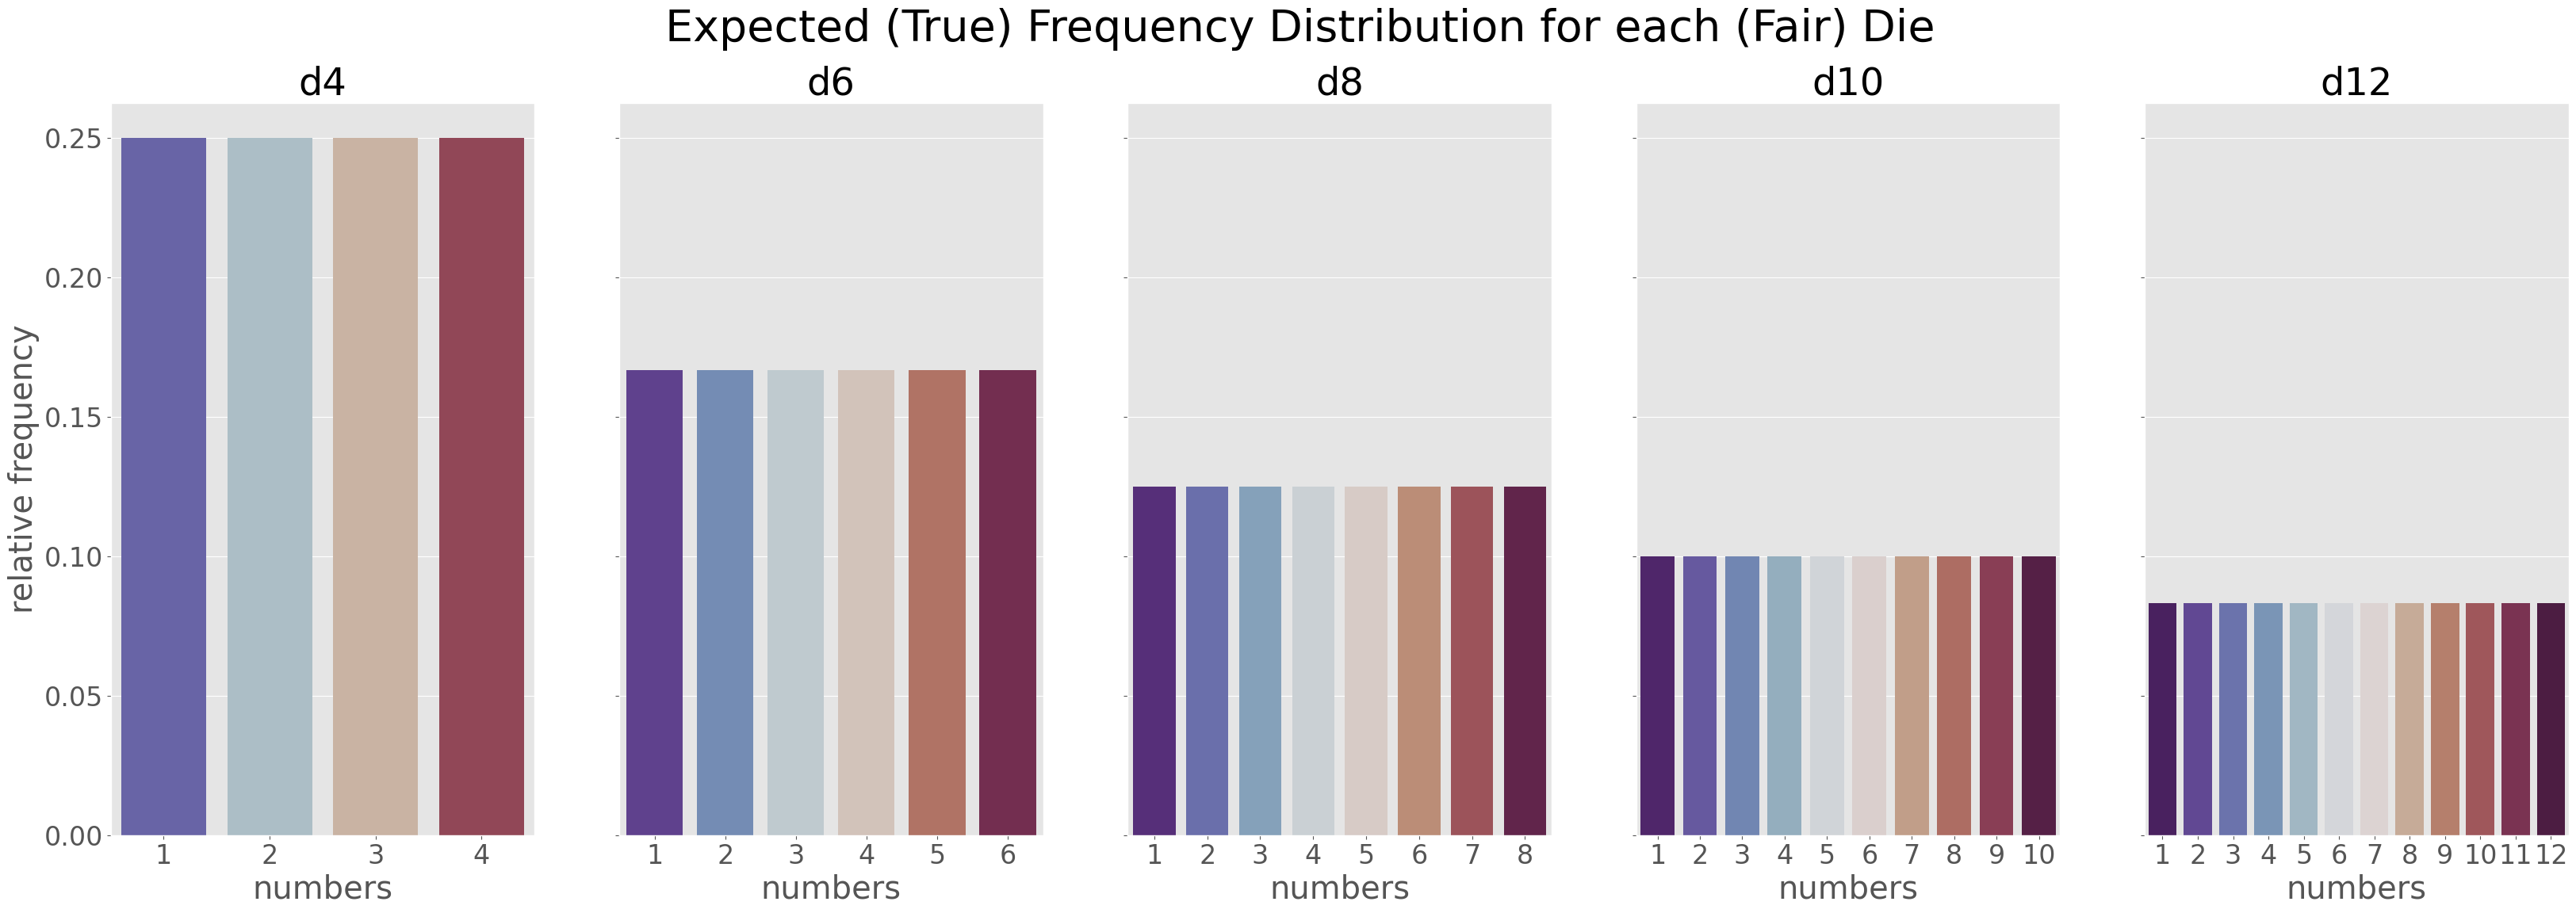

In [6]:
plt.rcParams.update({'font.size': 24})
axis_tup = ('ax1', 'ax2', 'ax3', 'ax4', 'ax5')
fig, axis_tup = plt.subplots(ncols=5, sharey=True, figsize=(40,12))
fig.suptitle(t='Expected (True) Frequency Distribution for each (Fair) Die', fontsize=40)

flag=1
for (die, axis) in zip(my_dice, axis_tup):
    sns.barplot(x=die['sides'], y=die['prob'], ax=axis, palette='twilight_shifted')
    axis.set_title(die['name'])
    axis.set_xlabel('numbers')
    
    if flag < 2:
        axis.set_ylabel('relative frequency')
    flag+=1

Now that we know what to expect, the dice are thrown. In the first experiment we throw them 20 times each and plot the observed frequency distribution. Then the experiment is repeated with each die thrown 2,000 times and 50,000 times.

### Observed Frequency Distribution for each Die

[{'name': 'd4', 'sides': array([1, 2, 3, 4]), 'rolls': [4, 4, 3, 3, 3, 2, 4, 3, 2, 4, 3, 4, 3, 2, 2, 3, 1, 3, 3, 3]}, {'name': 'd6', 'sides': array([1, 2, 3, 4, 5, 6]), 'rolls': [2, 2, 4, 3, 1, 4, 1, 2, 3, 4, 3, 6, 2, 5, 6, 6, 6, 3, 2, 6]}, {'name': 'd8', 'sides': array([1, 2, 3, 4, 5, 6, 7, 8]), 'rolls': [4, 4, 3, 3, 1, 4, 4, 8, 2, 7, 1, 2, 7, 6, 1, 5, 3, 8, 1, 3]}, {'name': 'd10', 'sides': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'rolls': [5, 9, 3, 7, 1, 3, 5, 9, 5, 5, 9, 1, 1, 7, 5, 5, 1, 10, 9, 3]}, {'name': 'd12', 'sides': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), 'rolls': [8, 5, 4, 12, 4, 5, 12, 9, 6, 2, 10, 9, 1, 8, 5, 12, 5, 4, 2, 5]}]


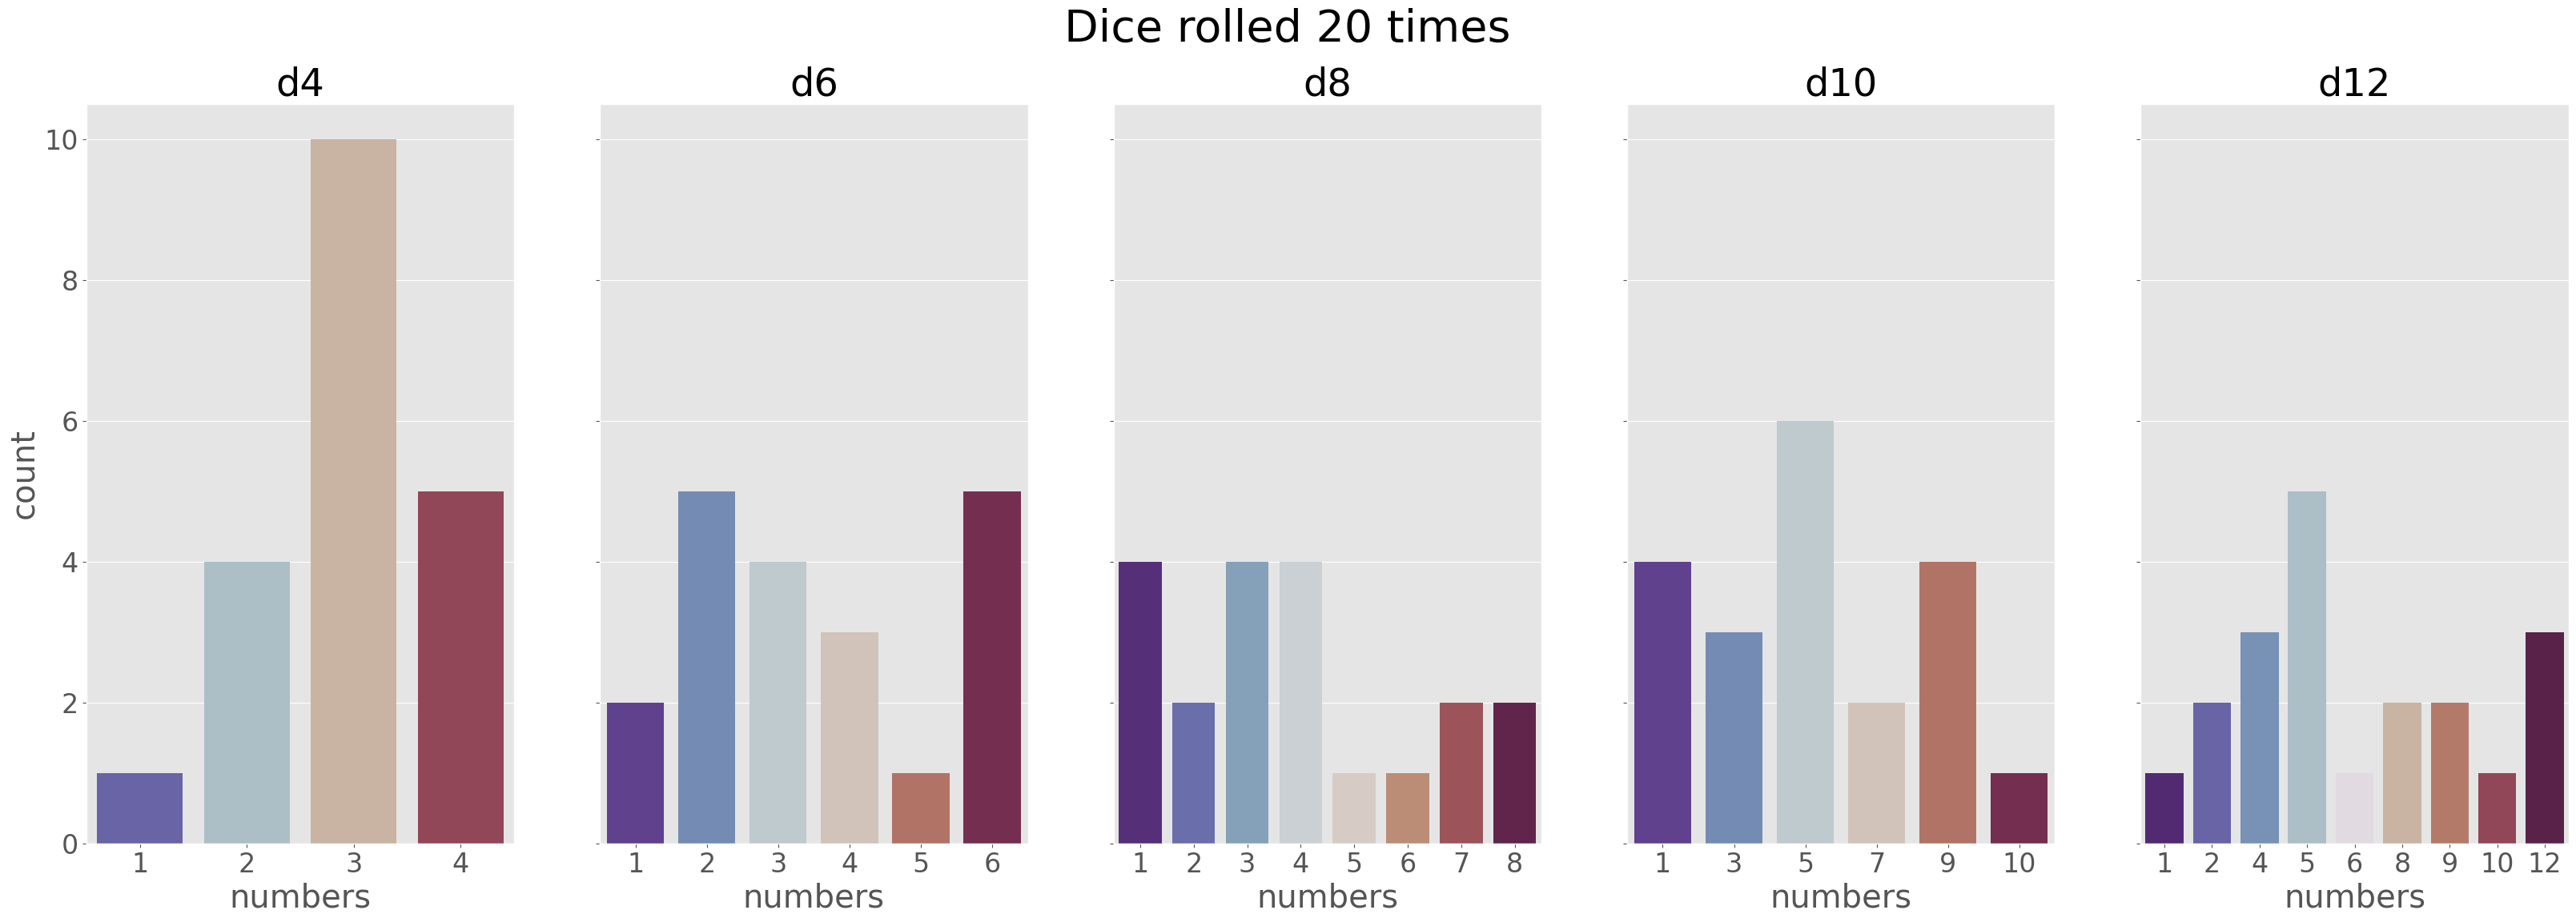

In [7]:
roll_20 = [{'name': 'd4', 'sides': d4, 'rolls': []},
           {'name': 'd6', 'sides': d6, 'rolls': []},
           {'name': 'd8', 'sides': d8, 'rolls': []},
           {'name': 'd10', 'sides': d10, 'rolls': []},
           {'name': 'd12', 'sides': d12, 'rolls': []}
          ]

for die in roll_20:
    for roll in range(20):
        roll = np.random.choice(die['sides'])
        die['rolls'].append(roll)
    
print(roll_20)

plt.rcParams.update({'font.size': 24})
fig, axis_tup = plt.subplots(ncols=5, sharey=True, figsize=(40,12))
fig.suptitle(t='Dice rolled 20 times', fontsize=40)

flag = 1
for (die, axis) in zip(roll_20, axis_tup):
    sns.countplot(x=die['rolls'], ax=axis, palette='twilight_shifted')
    axis.set_title(die['name'])
    axis.set_xlabel('numbers')
    if flag > 1:
        axis.set_ylabel('')
    flag+=1

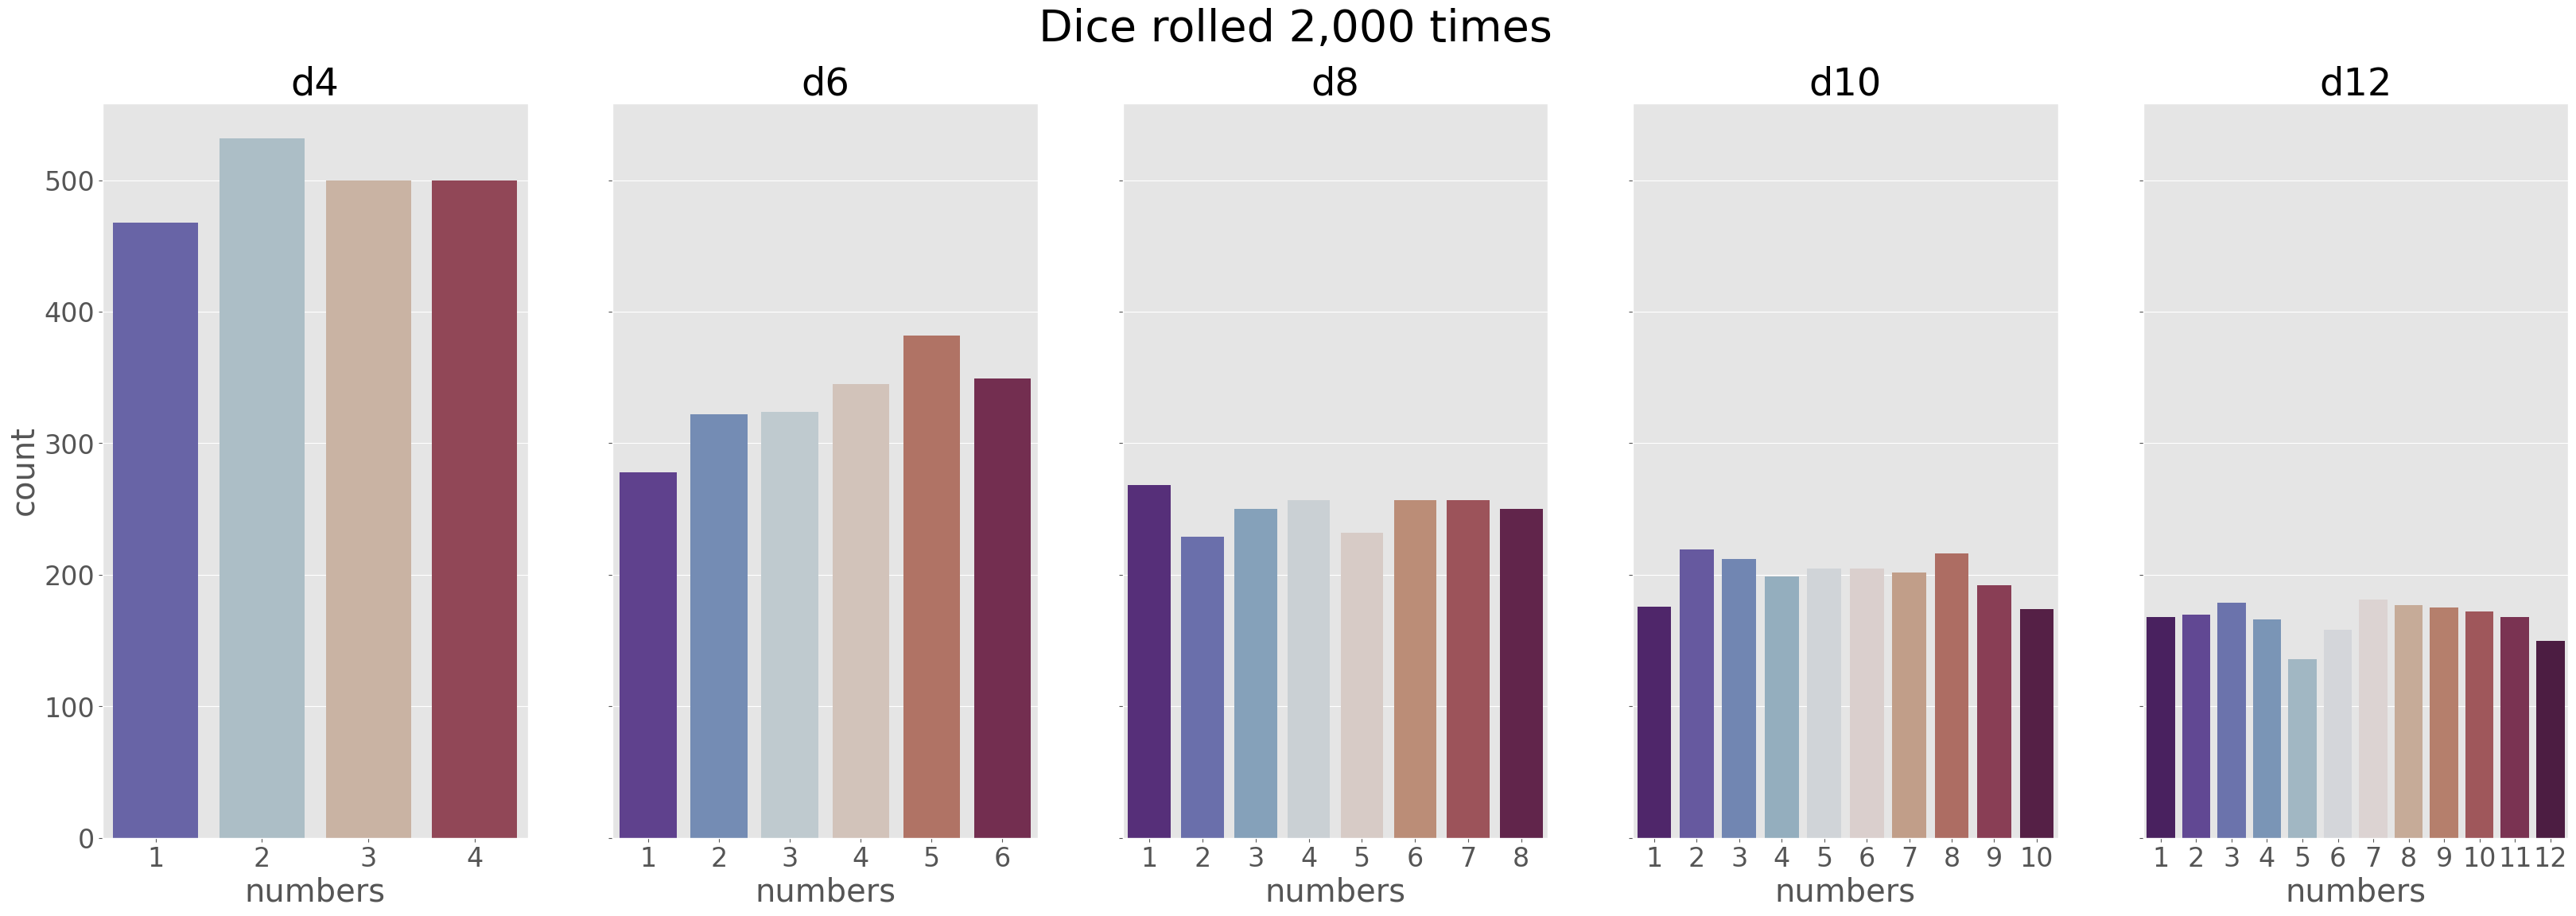

In [8]:
roll_2000 = [{'name': 'd4', 'sides': d4, 'rolls': []},
             {'name': 'd6', 'sides': d6, 'rolls': []},
             {'name': 'd8', 'sides': d8, 'rolls': []},
             {'name': 'd10', 'sides': d10, 'rolls': []},
             {'name': 'd12', 'sides': d12, 'rolls': []}
            ]

for die in roll_2000:
    for roll in range(2000):
        roll = np.random.choice(die['sides'])
        die['rolls'].append(roll)

plt.rcParams.update({'font.size': 24})
fig, axis_tup = plt.subplots(ncols=5, sharey=True, figsize=(40,12))
fig.suptitle(t='Dice rolled 2,000 times', fontsize=40)

flag = 1
for (die, axis) in zip(roll_2000, axis_tup):
    sns.countplot(x=die['rolls'], ax=axis, palette='twilight_shifted')
    axis.set_title(die['name'])
    axis.set_xlabel('numbers')
    if flag > 1:
        axis.set_ylabel('')
    flag+=1

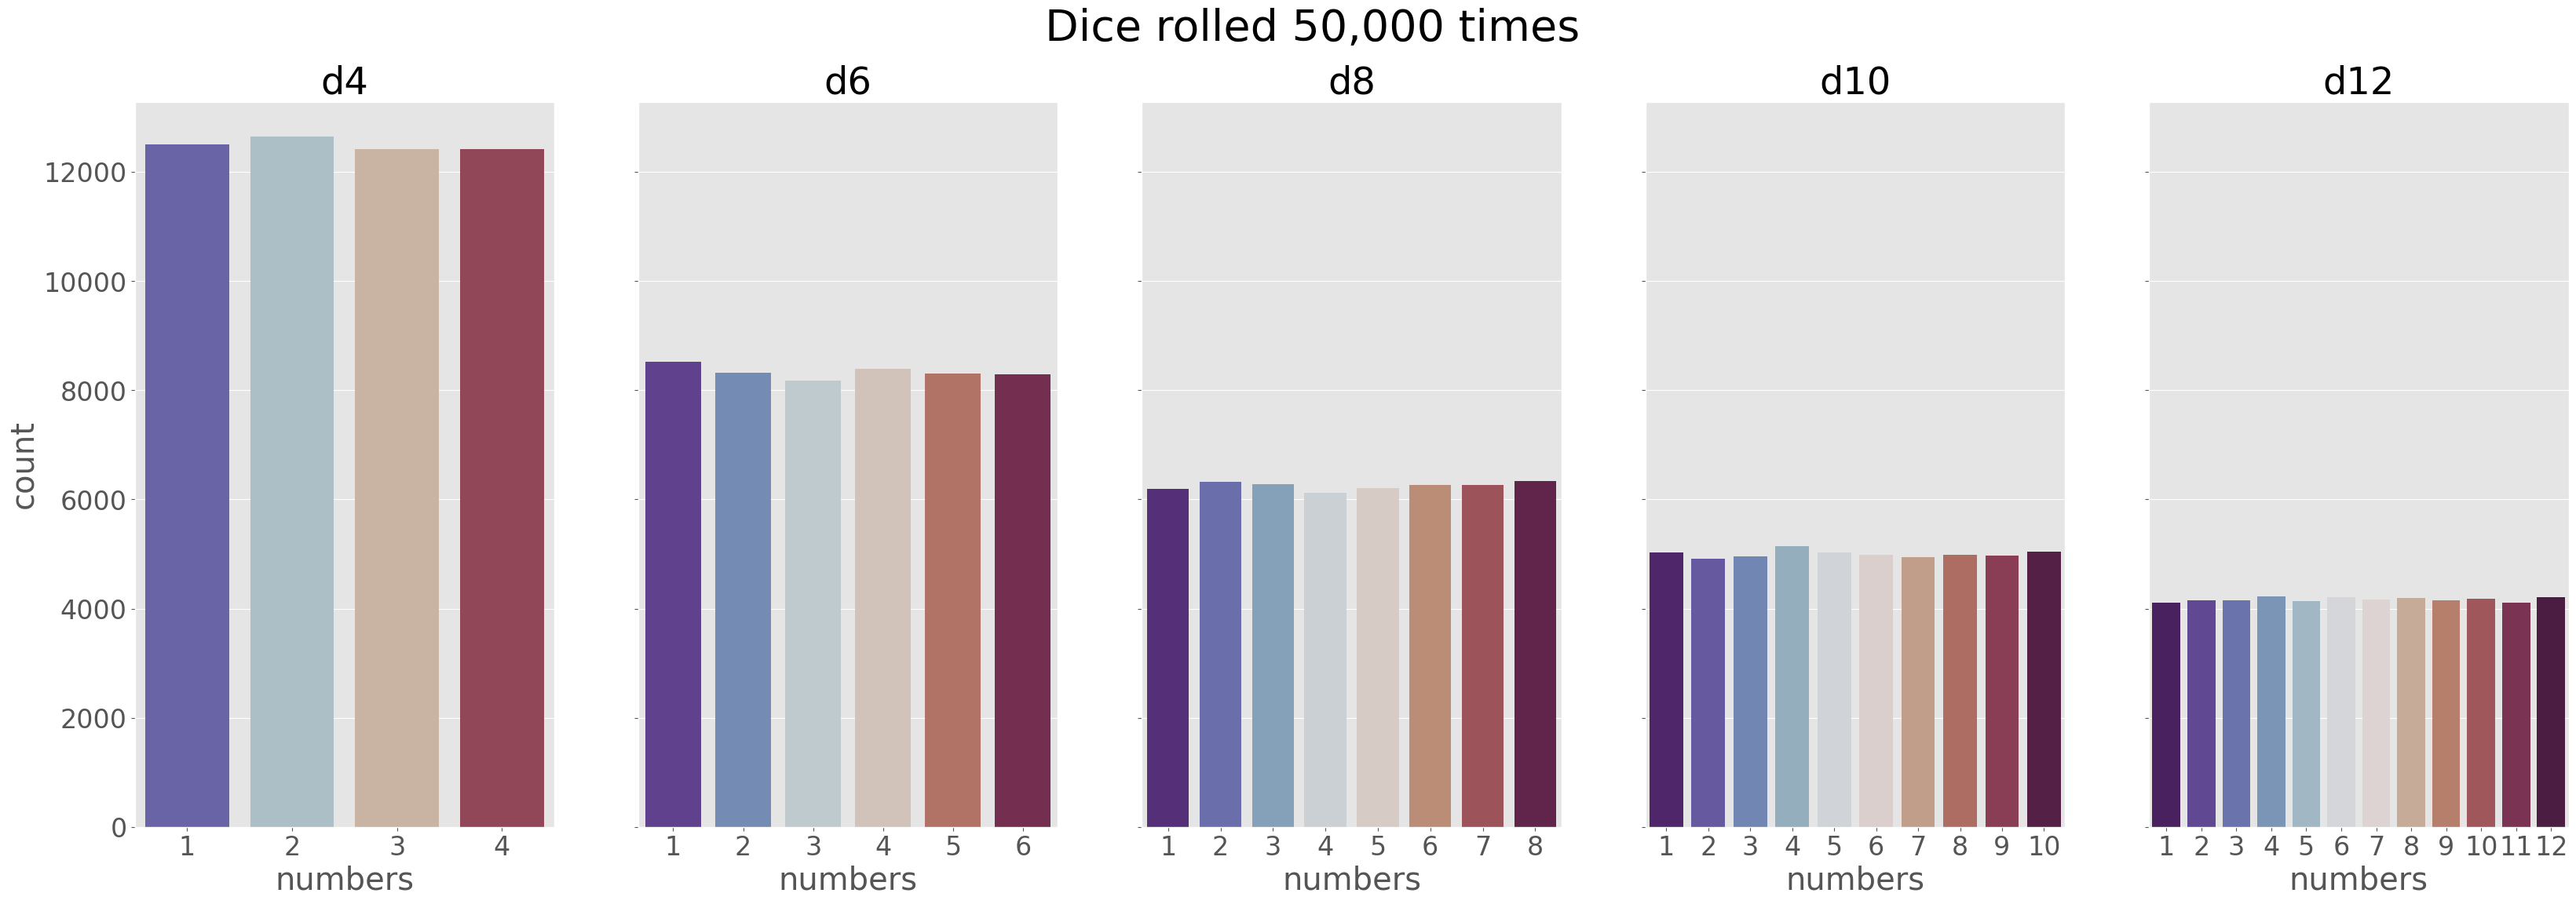

In [9]:
roll_50_000 = [{'name': 'd4', 'sides': d4, 'rolls': []},
               {'name': 'd6', 'sides': d6, 'rolls': []},
               {'name': 'd8', 'sides': d8, 'rolls': []},
               {'name': 'd10', 'sides': d10, 'rolls': []},
               {'name': 'd12', 'sides': d12, 'rolls': []}
              ]

for die in roll_50_000:
    for roll in range(50_000):
        roll = np.random.choice(die['sides'])
        die['rolls'].append(roll)

plt.rcParams.update({'font.size': 24})
fig, axis_tup = plt.subplots(ncols=5, sharey=True, figsize=(40,12))
fig.suptitle(t='Dice rolled 50,000 times', fontsize=40)

flag = 1
for (die, axis) in zip(roll_50_000, axis_tup):
    sns.countplot(x=die['rolls'], ax=axis, palette='twilight_shifted')
    axis.set_title(die['name'])
    axis.set_xlabel('numbers')
    if flag > 1:
        axis.set_ylabel('')
    flag+=1

As we can see from the results, the more data we collect, the closer the observed frequency distribution is to the true frequency distribution. With increasing repetitions of the random experiment, the long-term frequency approaches the expected true parameters. And this is the core essence of Frequentist statistics.

## A Bayesian Question
To illustrate the Bayesian approach, we create a slightly different scenario with our five dice: We will roll only one of the dice which is chosen at random. Before we collect any data, we develop a prior distribution that reflects our beliefs about the experiment. Since we have no further information, we expect the dice are equally likely to be chosen. Formally, we expect the probability that each one of the dice is chosen to follow a discrete uniform distribution.

### Prior Distribution of Dice Selection

[Text(0.5, 0, 'Dice'), Text(0, 0.5, 'Probability of Selection')]

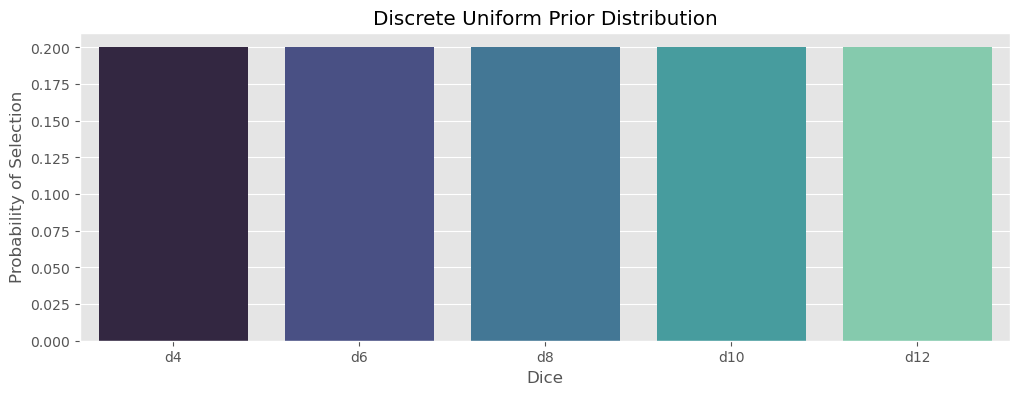

In [10]:
dice_list = ['d4', 'd6', 'd8', 'd10', 'd12']
prior_prob = []
for item in dice_list:
    prob = (1/len(dice_list))
    prior_prob.append(prob)

plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(ncols=1, figsize=(12,4))

sns.barplot(x=dice_list, y=prior_prob, ax=ax1, palette='mako').set_title('Discrete Uniform Prior Distribution')
ax1.set(xlabel='Dice', ylabel='Probability of Selection')

After we chose a suitable prior, we conduct the random experiment and collect data: One of the dice is chosen and thrown once. Let's say, it shows the number 3. So, what is our updated belief of the probability for the dice that was chosen and actually yielded the number 3? As we saw in the Frequentist variant, the smaller dice have a higher probability of yielding a certain number given this number is included in every die. Thus, it should be more likely for us to observe a 3 on a d4 or d6 than on a d10 or d12. This is fairly intuitive, and we can apply Bayes theorem to calculate the posterior probability distribution.

### Posterior Distribution of Dice Selection
As a first step, let's visualize the probability tree of the experiment to aid us in calculating the conditional probabilities of each event. The term we are looking for in the specific case is P(D4|3) and accordingly for all other dice. The terms we need for the calculation are displayed in the figure below.

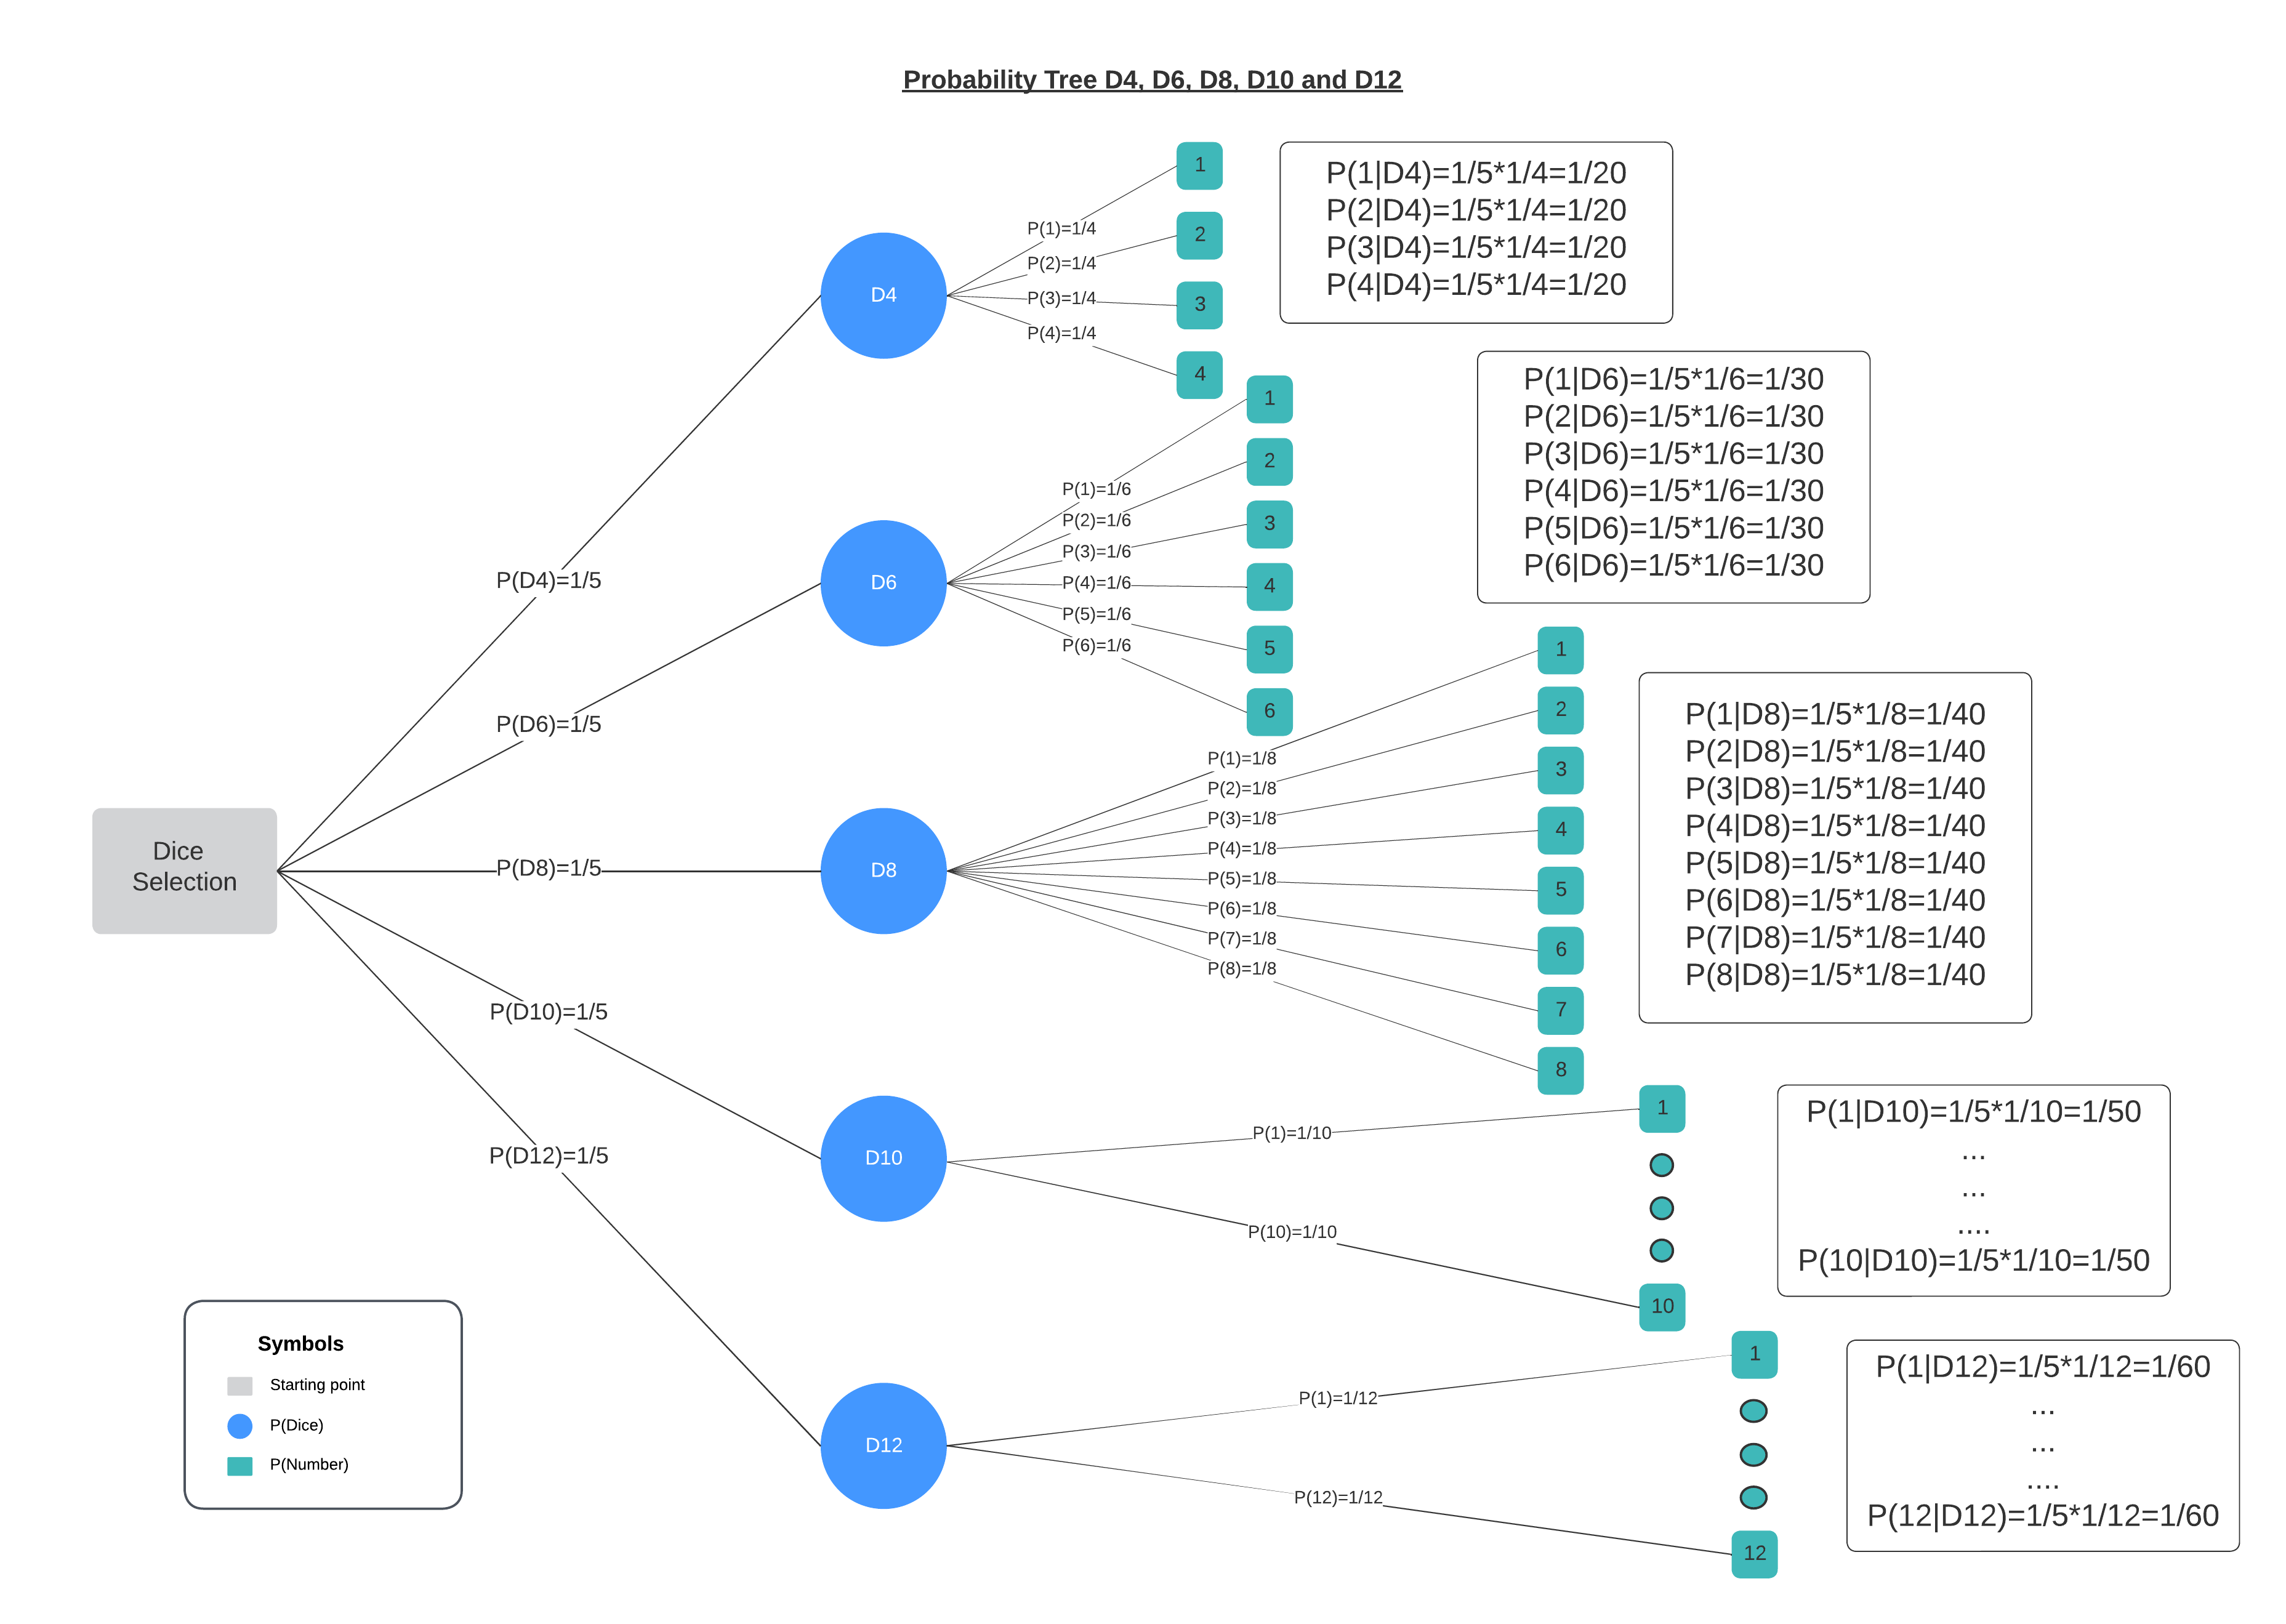

In [11]:
post_prob = []

pd4_3 = (1/5*1/20)/((1/5*1/20)+(1/5*1/30)+(1/5*1/40)+(1/5*1/50)+(1/5*1/60))
print(f"P(D4|3) = {round(pd4_3, 4)}")

pd6_3 = (1/5*1/30)/((1/5*1/20)+(1/5*1/30)+(1/5*1/40)+(1/5*1/50)+(1/5*1/60))
print(f"P(D6|3) = {round(pd6_3, 4)}")

pd8_3 = (1/5*1/40)/((1/5*1/20)+(1/5*1/30)+(1/5*1/40)+(1/5*1/50)+(1/5*1/60))
print(f"P(D8|3) = {round(pd8_3, 4)}")

pd10_3 = (1/5*1/50)/((1/5*1/20)+(1/5*1/30)+(1/5*1/40)+(1/5*1/50)+(1/5*1/60))
print(f"P(D10|3) = {round(pd10_3, 4)}")

pd12_3 = (1/5*1/60)/((1/5*1/20)+(1/5*1/30)+(1/5*1/40)+(1/5*1/50)+(1/5*1/60))
print(f"P(D12|3) = {round(pd12_3, 4)}")

post_prob.append(pd4_3)
post_prob.append(pd6_3)
post_prob.append(pd8_3)
post_prob.append(pd10_3)
post_prob.append(pd12_3)

total = sum(post_prob)
print(f"\nTest for plausability:\nIn a scenario with a discrete and finite set of outcomes,"
      f"the total probability must be 1 and is indeed {round(total, 4)}.")

P(D4|3) = 0.3448
P(D6|3) = 0.2299
P(D8|3) = 0.1724
P(D10|3) = 0.1379
P(D12|3) = 0.1149

Test for plausability:
In a scenario with a discrete and finite set of outcomes,the total probability must be 1 and is indeed 1.0.


[Text(0.5, 0, 'Dice'), Text(0, 0.5, 'Probability of Selection')]

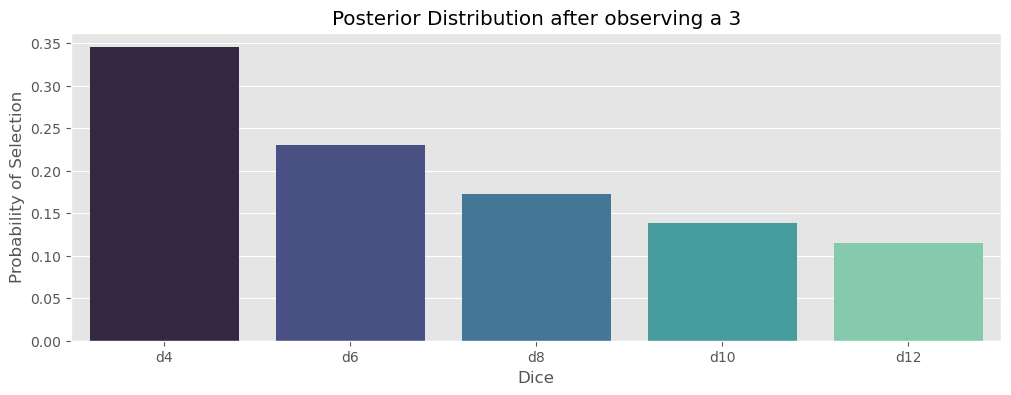

In [12]:
plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(ncols=1, figsize=(12,4))

sns.barplot(x=dice_list, y=post_prob, ax=ax1, palette='mako').set_title('Posterior Distribution after observing a 3')
ax1.set(xlabel='Dice', ylabel='Probability of Selection')

So, the posterior distribution takes into account that smaller dice have a higher probability of yielding a certain number *if* they are chosen. This looks the same for all numbers that are represented on each die. But what about the other numbers?

Let's play out the same scenario again, but this time let's say we observed the number 9. For the sake of simplicity, we start with the same uniform prior, but this time, we know that a 9 can only come from the d10 and the d12. All other dice have a probability of 0 to yield a 9 - it is straight up impossible!

In [13]:
post_prob_9 = [0, 0, 0]

pd10_9 = (1/5*1/50)/(0+0+0+(1/5*1/50)+(1/5*1/60))
print(f"P(D10|3) = {round(pd10_9, 4)}")

pd12_9 =(1/5*1/60)/((1/5*1/50)+(1/5*1/60))
print(f"P(D12|3) = {round(pd12_9, 4)}")

post_prob_9.append(pd10_9)
post_prob_9.append(pd12_9)

total_9 = sum(post_prob_9)
print(f"\nTest for plausability:\nThe total probability is {round(total_9, 4)}.")

P(D10|3) = 0.5455
P(D12|3) = 0.4545

Test for plausability:
The total probability is 1.0.


[Text(0.5, 0, 'Dice'), Text(0, 0.5, 'Probability of Selection')]

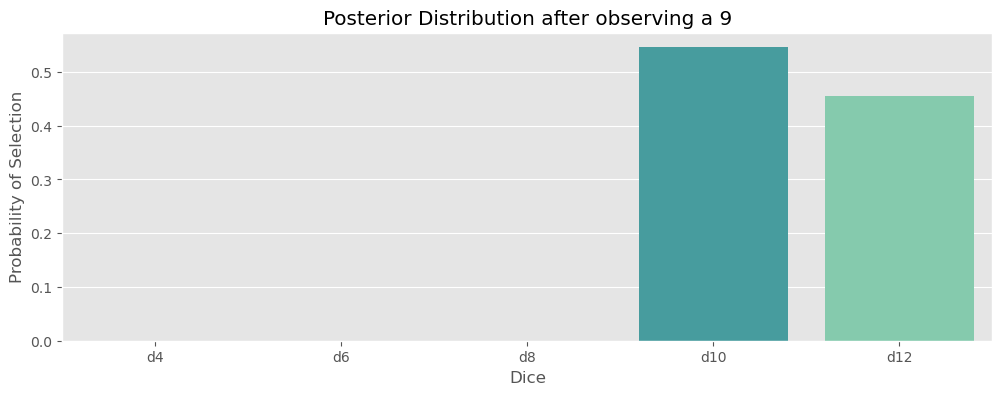

In [14]:
plt.rcParams.update({'font.size': 10})
fig, ax1 = plt.subplots(ncols=1, figsize=(12,4))

sns.barplot(x=dice_list, y=post_prob_9, ax=ax1, palette='mako').set_title('Posterior Distribution after observing a 9')
ax1.set(xlabel='Dice', ylabel='Probability of Selection')

Little surprisingly we see that again the smaller die has a higher probability of yielding the observed number, so if we were to bet a the die chosen, it would always be the smaller one of the dice possible. This experiment showed how the prior belief is updated in dependence of that observed data what is the core idea of Bayesian statistics.

## One last Takeaway
This example was chosen to be very basic and very simplistic with almost no unknown parameters involved. It has great similarity with the commonly used examples of throwing two d6 for introducing Frequentist statistics and selecting one of several urns containing colored balls for introducing Bayesian statistics. Indeed, combining an illustration of the different ways of thinking of Frequentist and Bayesian statistics in one test setup was the aim of this example. It is important to note that the concepts explained in this work can be transferred without problems to more complex and more practical experiments, like for example point or interval estimation, hypothesis testing (for example in clinical trials) or multiple regression to name only a few. The more complex the test setup is, the more planning is required for conducting the experiment, especially with regard to sampling meth-ods and analysis tools to avoid biases and pitfalls. This is where other statistical tools come into play, like parametric and non-parametric tests or exploratory methods like principal component analysis and clustering.